# Modelo 2 - Hierarchical

### Carga de datos procesados

In [7]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

In [2]:
# Lectura de datos
df_habitantes = pd.read_csv('../datos/procesados/habitantes_de_calle_2022_procesado.csv')

In [3]:
# Toma de columnas relacionadas con drogas que consume actualmente y edad de inicio de consumo
# col_consumo_actual = [col for col in df_habitantes.columns if col.lower().startswith('actualmente')]
col_edad_inicio_consumo = [col for col in df_habitantes.columns if col.lower().startswith('edad inicio')]
df_consumo_drogas = df_habitantes[col_edad_inicio_consumo + ['hombre o mujer']].copy()
df_consumo_drogas.head()


,Edad inicio del consumo 1 cigarrillo,"Edad inicio del consumo 2 alcohol (Bebidas alcohólicas, chamber, etílico)",Edad inicio del consumo 3 marihuana,"Edad inicio del consumo 4 inhalantes (sacol, pegante, boxer, gasolina, thiner, etc)",Edad inicio del consumo 5 cocaína,Edad inicio del consumo 6 basuco,Edad inicio del consumo 7 heroína,Edad inicio del consumo 8 pepas,"Edad inicio del consumo 9 otras (maduro, pistolo, etc)",hombre o mujer
0,15.0,16.0,15.0,15.0,16.0,17.0,18.0,16.0,16.0,1.0
1,15.0,16.0,15.0,15.0,16.0,17.0,18.0,16.0,16.0,1.0
2,15.0,16.0,15.0,15.0,16.0,17.0,18.0,16.0,16.0,1.0
3,15.0,16.0,15.0,15.0,16.0,17.0,18.0,16.0,16.0,1.0
4,15.0,16.0,15.0,15.0,16.0,17.0,18.0,16.0,16.0,1.0


In [4]:
# Captura del nombre
def extraer_sustancia(col):
    ''' Extrae solo la sustancia del nombre de la columna y la renombra solo con la sustancia'''
    match = re.search(r'consumo\s+\d+\s+([^\(]+)', col.lower())
    if match:
        sustancia = match.group(1).strip()
        return sustancia.capitalize()
    return col

In [5]:
# Cambio de nombre de columnas
df_consumo_drogas.columns = [extraer_sustancia(col) if 'consumo' in col.lower() else col for col in df_consumo_drogas.columns]

In [6]:
df_consumo_drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5343 entries, 0 to 5342
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cigarrillo      5343 non-null   float64
 1   Alcohol         5343 non-null   float64
 2   Marihuana       5343 non-null   float64
 3   Inhalantes      5343 non-null   float64
 4   Cocaína         5343 non-null   float64
 5   Basuco          5343 non-null   float64
 6   Heroína         5343 non-null   float64
 7   Pepas           5343 non-null   float64
 8   Otras           5343 non-null   float64
 9   hombre o mujer  5343 non-null   float64
dtypes: float64(10)
memory usage: 417.6 KB


In [8]:
scaler = StandardScaler()
df_consumo_drogas_escalado = scaler.fit_transform(df_consumo_drogas)

### Modelo sin PCA

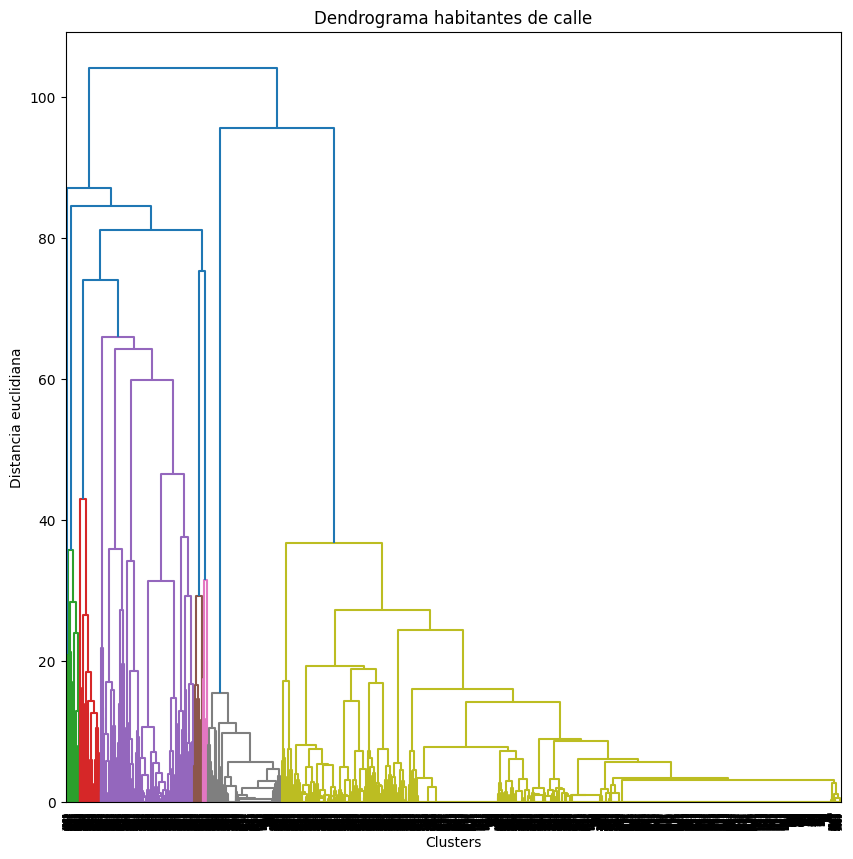

In [ ]:
# Gráfica de dendograma para conocer la cantidad de posibles cluster
fig = plt.figure(figsize=(10, 10))
dendogram_plot = dendrogram(linkage(df_consumo_drogas_escalado, method='ward'))
plt.title('Dendrograma habitantes de calle')
plt.xlabel('Clusters')
plt.ylabel('Distancia euclidiana')
plt.show();

In [13]:
# Aplicación del modelo
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_consumo_drogas_escalado)
print(f'Silhouette_score: {silhouette_score(df_consumo_drogas_escalado, y_hc)}')
df_consumo_drogas['hc'] = y_hc

Silhouette_score: 0.534856785583805


### Evaluación del modelo sin PCA

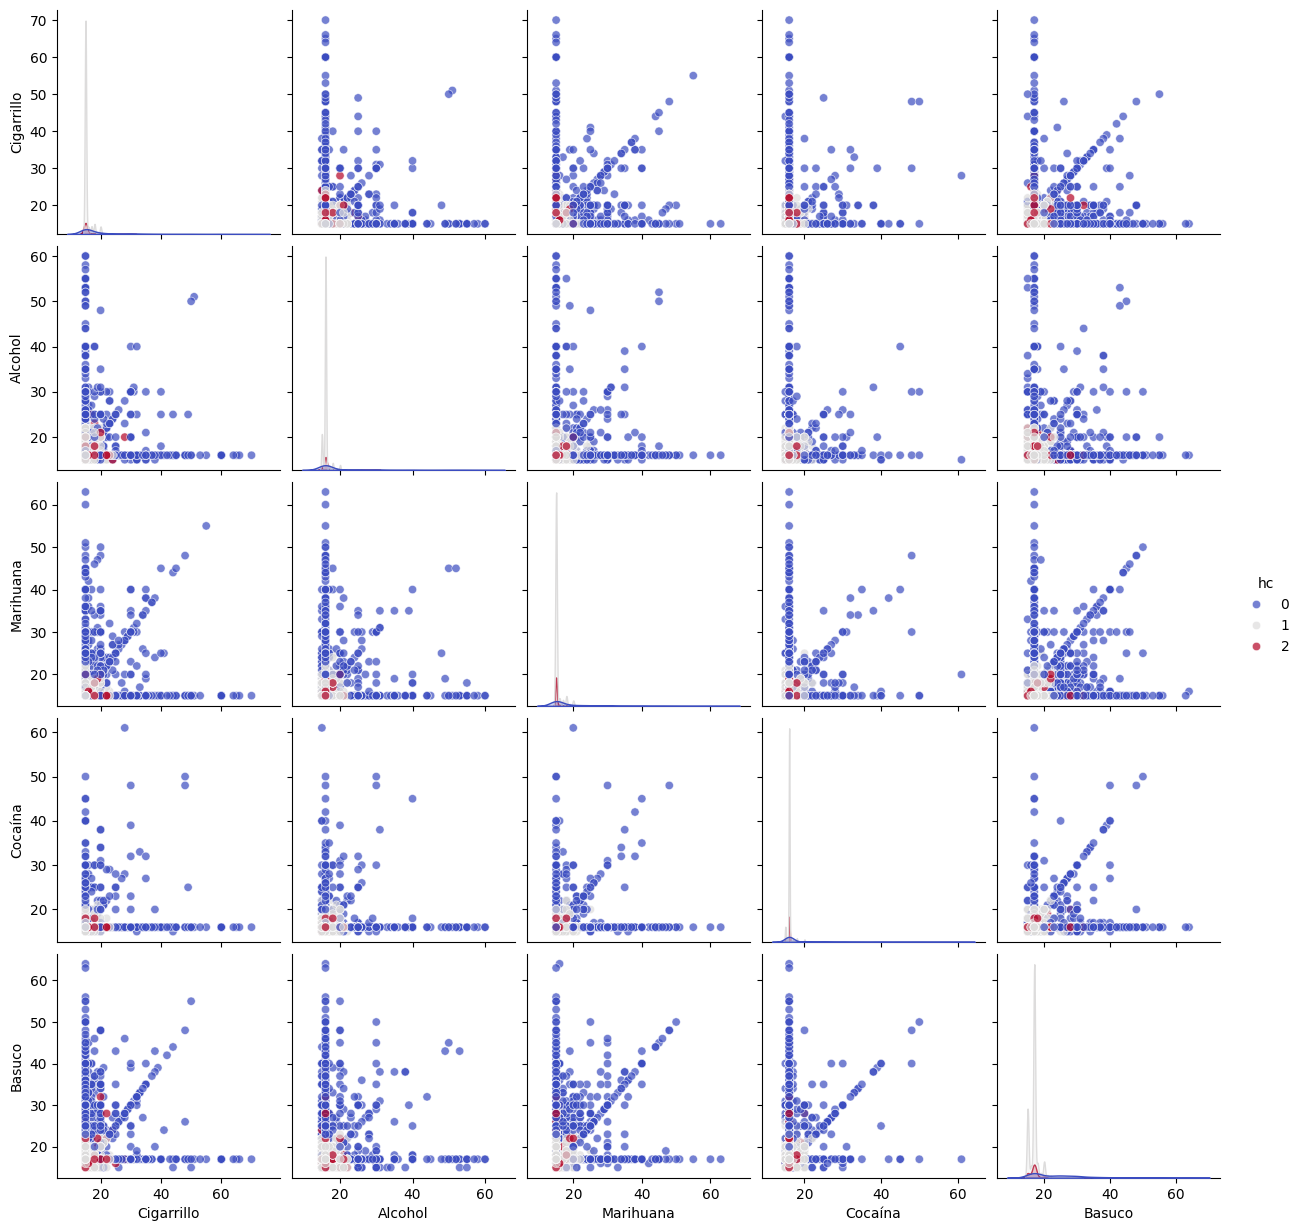

In [ ]:
# Evaluación del modelo con PCA con algunas variables
sns.pairplot(df_consumo_drogas[['Cigarrillo', 'Alcohol', 'Marihuana', 'Cocaína', 'Basuco', 'hc']], hue='hc', palette='coolwarm', plot_kws={'alpha': 0.7})
plt.show();

### Modelo con PCA

In [16]:
# Aplicación de PCA
pca = PCA()
pca.fit(df_consumo_drogas_escalado)
pca_data_preprocesada = pca.transform(df_consumo_drogas_escalado)
pca_data_preprocesada

array([[-0.55726606,  0.17881828, -0.06882226, ..., -0.04857364,
        -0.04612169, -0.01610184],
       [-0.55726606,  0.17881828, -0.06882226, ..., -0.04857364,
        -0.04612169, -0.01610184],
       [-0.55726606,  0.17881828, -0.06882226, ..., -0.04857364,
        -0.04612169, -0.01610184],
       ...,
       [-0.55726606,  0.17881828, -0.06882226, ..., -0.04857364,
        -0.04612169, -0.01610184],
       [ 1.16669523, -1.09990483, -0.15674727, ..., -0.02625204,
        -0.63405878,  1.66355866],
       [ 2.6686643 , -2.24261994, -0.54174892, ...,  0.68070387,
        -1.45646422,  2.24358532]], shape=(5343, 10))

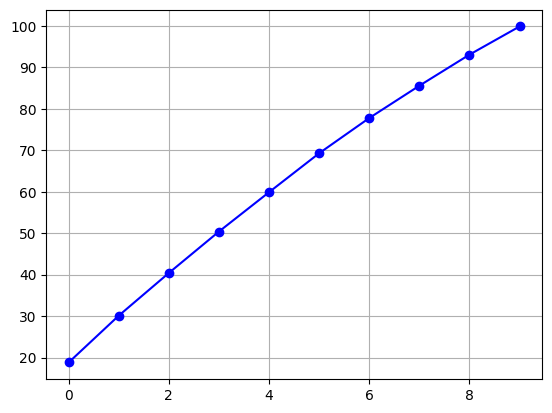

In [17]:
# Gráfica de varianza acumulada
varianza = pca.explained_variance_ratio_
suma_acumulada = np.cumsum(np.round(varianza, decimals=3)*100)
plt.plot(suma_acumulada, 'b-o')
plt.grid()
plt.show();

In [ ]:
# Creación del df con la cantidad de columnas de acuerdo con los resultados de PCA
pca_df_consumo_escalado = pd.DataFrame(pca_data_preprocesada) # Crea un df con la data escalada
pca_df_consumo_escalado.drop(columns=pca_df_consumo_escalado.columns[8:], inplace=True)

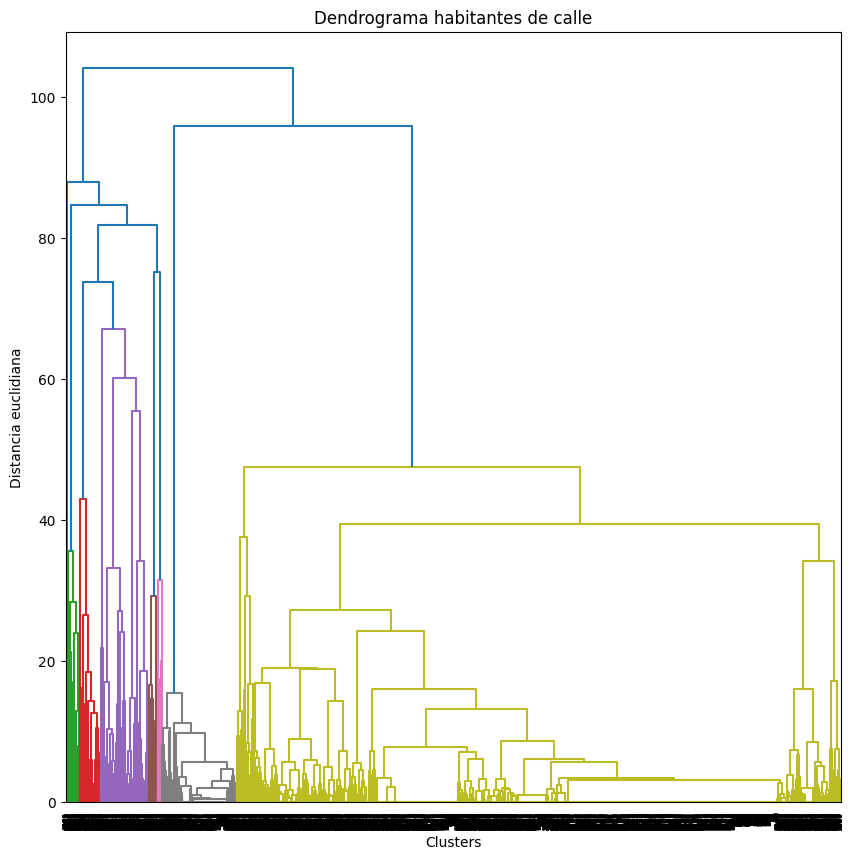

In [21]:
# Gráfica de dendograma para conocer la cantidad de posibles cluster
fig = plt.figure(figsize=(10, 10))
dendogram_plot = dendrogram(linkage(pca_data_preprocesada, method='ward'))
plt.title('Dendrograma habitantes de calle')
plt.xlabel('Clusters')
plt.ylabel('Distancia euclidiana')
plt.show();

In [22]:
# Aplicación del modelo
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_preprocesada)
print(f'Silhouette_score: {silhouette_score(pca_data_preprocesada, y_hc)}')
df_consumo_drogas['hc_pca'] = y_hc

Silhouette_score: 0.5443434385429037


### Evaluación del modelo con PCA

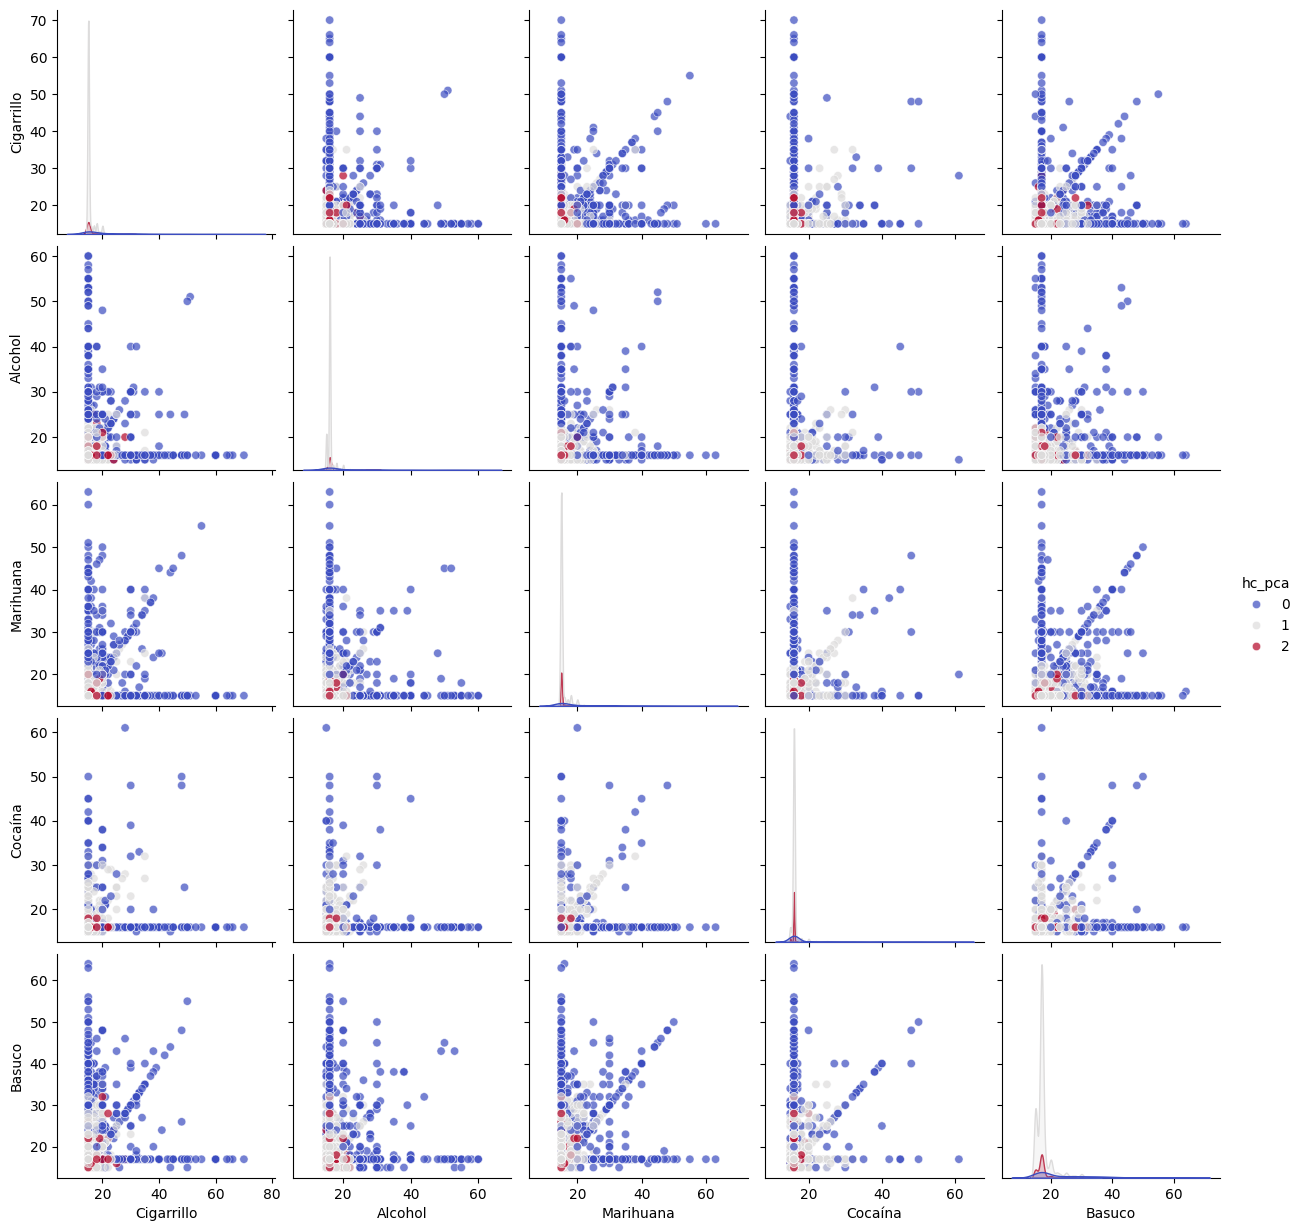

In [23]:
# Evaluación del modelo con PCA con algunas variables
sns.pairplot(df_consumo_drogas[['Cigarrillo', 'Alcohol', 'Marihuana', 'Cocaína', 'Basuco', 'hc_pca']], hue='hc_pca', palette='coolwarm', plot_kws={'alpha': 0.7})
plt.show();